In [3]:
import numpy as np
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt

In [4]:
import scipy.stats

In [35]:
import statsmodels.sandbox.stats.multicomp

In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
data = pd.read_csv ('ab_browser_test.csv')

In [4]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [7]:
data_exp = data[data['slot'] == 'exp']
data_contr = data[data['slot'] == 'control']

In [13]:
print data_exp['n_clicks'].sum()
print data_contr['n_clicks'].sum()

3261823
3210027


In [21]:
round ((float(data_exp['n_clicks'].sum())/data_contr['n_clicks'].sum() - 1)*100,3)

1.614

In [22]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [23]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [24]:
n_click_exp = data_exp['n_clicks']
n_click_contr = data_contr['n_clicks']

In [27]:
np.random.seed(0)

n_click_exp_median_scores = map(np.median, get_bootstrap_samples(np.array(n_click_exp), 1000))
n_click_contr_median_scores = map(np.median, get_bootstrap_samples(np.array(n_click_contr), 1000))

print "95% confidence interval for the ILEC median repair time:",  stat_intervals(n_click_exp_median_scores, 0.05)
print "95% confidence interval for the CLEC median repair time:",  stat_intervals(n_click_contr_median_scores, 0.05)

95% confidence interval for the ILEC median repair time: [5. 5.]
95% confidence interval for the CLEC median repair time: [4. 4.]


In [28]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(n_click_exp_median_scores, n_click_contr_median_scores))

In [29]:
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [-1. -1.]


In [30]:
np.random.seed(0)

n_click_exp_mean_scores = map(np.mean, get_bootstrap_samples(np.array(n_click_exp), 1000))
n_click_contr_mean_scores = map(np.mean, get_bootstrap_samples(np.array(n_click_contr), 1000))

print "95% confidence interval for the ILEC median repair time:",  stat_intervals(n_click_exp_mean_scores, 0.05)
print "95% confidence interval for the CLEC median repair time:",  stat_intervals(n_click_contr_mean_scores, 0.05)

95% confidence interval for the ILEC median repair time: [11.5086867  11.66089388]
95% confidence interval for the CLEC median repair time: [11.20795095 11.35742732]


In [32]:
delta_mean_scores = map(lambda x: x[1] - x[0], zip(n_click_exp_mean_scores, n_click_contr_mean_scores))

In [34]:
print "95% confidence interval for the difference between medians",  stat_intervals(delta_mean_scores, 0.05)

95% confidence interval for the difference between medians [-0.40475697 -0.19172563]


In [46]:
boot_sample_mean = []
boot_chi_square = []
np.random.seed(0)
boot_samples = get_bootstrap_samples(np.array(n_click_contr), 100)
k = 0
for i in boot_samples:
    boot_sample_mean.append (i.mean())
    comulat_chi_square = 0
    if k%100 ==0:
        print k
    for j in i:
        comulat_chi_square += (boot_sample_mean[k] - j)**2
    k +=1
    boot_chi_square.append (comulat_chi_square)

0


In [49]:
boot_sample_mean = np.array(boot_sample_mean)
boot_chi_square = np.array (boot_chi_square)

0.9946123334211188


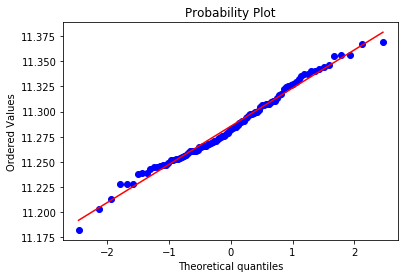

In [62]:
data_1 = scipy.stats.probplot (boot_sample_mean, plot = plt)
print data_1[1][2]

0.9929013674785317


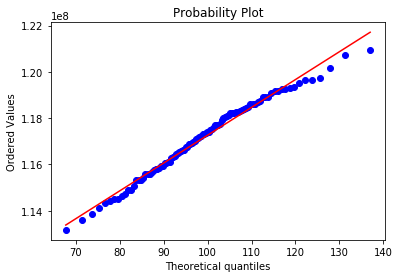

In [64]:
data_2 = scipy.stats.probplot (boot_chi_square, dist = 'chi2',sparams = (len(boot_chi_square) -1),plot = plt)
print data_2[1][2]

In [18]:
scipy.stats.mannwhitneyu(data_exp['n_clicks'], data_contr['n_clicks'])

MannwhitneyuResult(statistic=38940590204.0, pvalue=3.1236179006848145e-75)

In [15]:
browsers = data['browser'].values
browsers = np.unique(browsers)

In [25]:
data_exp[data_exp['browser'] == browsers[1]].n_clicks

10          7
42         63
96         83
107        25
133         9
165        45
185        35
203         2
205         2
219        33
242        38
261        63
262         4
263        10
278        52
299       235
328        25
365        67
368         0
373         4
374        87
415        57
440       277
476        38
485        21
515        68
516         0
576       224
588       112
611         6
         ... 
565128      2
565153      0
565211      0
565301      1
565352      1
565354      1
565392      1
565437      2
565449      2
565518      2
565520      3
565533      0
565544      4
565557      1
565558      0
565635      2
565699      0
565720      2
565749      1
565765      1
565794      1
565805      1
565846      0
565863      9
565867      2
565919      4
565948      0
566049      1
566093      1
566126      0
Name: n_clicks, Length: 16253, dtype: int64

In [27]:
p_val = []
for browser in browsers:
    p_val.append(scipy.stats.mannwhitneyu(data_exp[data_exp['browser'] == browser].n_clicks, data_contr[data_contr['browser'] == browser].n_clicks)[1])

In [37]:
statsmodels.sandbox.stats.multicomp.multipletests (p_val, alpha = 0.05, method = 'fdr_bh')

(array([ True, False, False, False, False, False]),
 array([0.        , 0.0748012 , 0.0748012 , 0.45366656, 0.38610827,
        0.45366656]),
 0.008512444610847103,
 0.008333333333333333)

In [43]:
for browser in browsers:
    conter_count = float(data_contr[data_contr['browser'] == browser].n_nonclk_queries.sum())/data_contr[data_contr['browser'] == browser].n_queries.sum()
    exp_count = float(data_exp[data_exp['browser'] == browser].n_nonclk_queries.sum())/data_exp[data_exp['browser'] == browser].n_queries.sum()
    print conter_count, exp_count

0.575904113601 0.437556173613
0.362993667463 0.369374128487
0.459627471792 0.449827469486
0.405404847434 0.389773764837
0.405939765935 0.398539472197
0.469709296351 0.451429419036
